## ` > `[`@qwqoro`](https://github.com/qwqoro)`: Welcome! `
<br>

        // I created this out of interest in the summer of 2019 at the age of 15
        // Resources, links and libraries were updated in the spring of 2022

<div class="alert alert-block alert-info">
<b>Machine Learning level:</b> Script Kiddie
</div>

# Contents:

- <h3><a href="#💡-Idea">💡: Idea</a></h3>
    
- <h3><a href="#📋-Data">📋: Data</a></h3>
- <h3><a href="#✨-Preparations">✨: Preparations</a></h3>

    Anatomy of each file format; Making files corrupted
    - [Images](#Images): `BMP`,`JPEG`,`PNG`
    - [Videos](#Videos): `AVI`
    - [Audios](#Audios): `WAV`,`MP3`
    - [Executables](#Executables): `PE`
    
- <h3><a href="#🔎-Features">🔎: Features</a></h3>

    Process of feature engineering
    - [Thoughts](#Thoughts)
    - [Construction](#Construction)
    
- <h3><a href="#🤖-Training">🤖: Training</a></h3>

    - [Random Forest](#Random-Forest)
    - [K-Nearest Neighbors](#K-Nearest-Neighbors)
    - [CatBoost](#CatBoost)
    - [XGBoost](#XGBoost)
    - [LightGBM](#LightGBM)
- <h3><a href="#📊-Comparison">📊: Comparison</a></h3>
- <h3><a href="#✍-Testing">✍: Testing</a></h3>
- <h3><a href="#📚-Resources">📚: Resources</a></h3>
<br>
<br>

---

# 💡 Idea
_[> Back to contents](#Contents:)_
<br>

Solving CTF tasks led me to corrupted files at some point. When they lack distinctive features, such as signatures, most of the tools identify them as "`Text files`" or "`Data`", which is not useful at all, to be honest.

To proceed, it would be great to know their types, at least. Even though some files might be too broken to be fixed, unless you know the exact file format, which parts are missing and which part you have got before your eyes, I believe that guessing types may still be useful in some cases, e.g. criminal investigations — it might be important to find remains of what used to be evidences and analyze them thoroughly. Thus, my aim is to build models that would guess types of broken files.

<br>

---

# 📋 Data
_[> Back to contents](#Contents:)_
<br>

<div class="alert alert-block alert-warning">
⚠️ <b>Every piece of data belongs to its author(s)!</b> ⚠️<br>
⚠️ <b>All copyrights belongs to the original owners!</b> ⚠️<br>
The sources are listed here and credited in the <a href="#📚-Resources">"Resources"</a> section.
</div><br>

    // I use data for non-commercial purposes, as a hobbyist.
    // I do not distribute data.
<br>

- 🎨 **Images** (Raster)
    - (Uncompressed) `BMP`: [General-100 Dataset](http://mmlab.ie.cuhk.edu.hk/projects/FSRCNN.html) `[1]` + random files gathered from the Internet
    - (Lossy compression) `JPEG`: [UTKFace: Large Scale Face Dataset](https://susanqq.github.io/UTKFace/) `[2]`
    - (Lossless compression) `PNG`: random files gathered from the Internet
- 🎬 **Videos**
    - `AVI`: [HMDB: A Large Video Database for Human Motion Recognition](http://serre-lab.clps.brown.edu/resource/hmdb-a-large-human-motion-database/) `[3]`
- 🎧 **Audios**
    - (Uncompressed) `WAV`: [FSDnoisy18k](http://www.eduardofonseca.net/FSDnoisy18k/) `[4]`
    - (Lossy compression) `MP3`: [Mozilla Common Voice Dataset](https://commonvoice.mozilla.org/en/datasets)
- ⚙️ **Executables**
    - Portable Executables: [Microsoft Malware Classification Challenge](https://www.kaggle.com/c/malware-classification/) `[5]`

In [1]:
# Count files of each file format

from os import listdir
from os.path import isfile

folders = [ "Images_BMP", "Images_JPG", "Images_PNG","Videos_AVI","Audios_WAV","Audios_MP3","Executables_PE" ]
total = 0

for Type in folders:
    path = f"data/{Type}/"
    Type = Type.split('_')
    
    files = [ file for file in listdir(path) if isfile(path + file) ]
    num = len(files)
    total += num
    
    print(f"{num} files of {Type[1]} format \t({Type[0]})")
    

print('-' * 32)
print("Total number of files: ", total)

1000 files of BMP format 	(Images)
1000 files of JPG format 	(Images)
1000 files of PNG format 	(Images)
3000 files of AVI format 	(Videos)
1500 files of WAV format 	(Audios)
1500 files of MP3 format 	(Audios)
3000 files of PE format 	(Executables)
--------------------------------
Total number of files:  12000


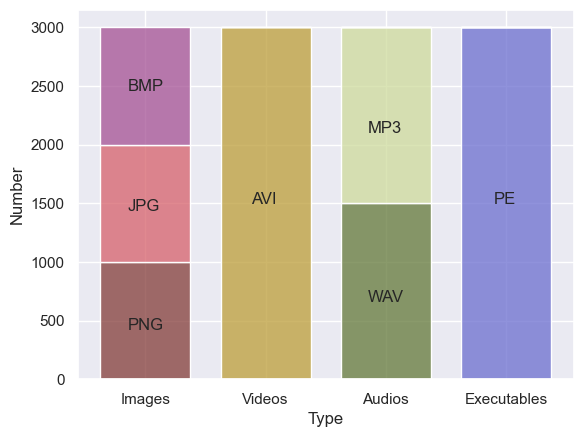

---

# ✨ Preparations
_[> Back to contents](#Contents:)_

<br>

In this part I break down each file format.
<br>By that I mean **describe their structure** and then **make them corrupted** to extract features & train models.
<br>

<div class="alert alert-block alert-warning">
⚠️ <b>Every image belongs to its author(s)!</b> ⚠️<br>
⚠️ <b>All copyrights belongs to the original owners!</b> ⚠️<br>
The sources are listed here and credited in the <a href="#📚-Resources">"Resources"</a> section.
</div><br>

    // I use images for demonstration purposes; I did not make any changes to these images.

In [2]:
from tqdm import tqdm                    # to display progress
from binascii import hexlify             # to view hexadecimal representation of binary data
from binascii import unhexlify
from re import finditer                  # to find all occurrences of a byte sequence in file

## Images
- <h3>BMP</h3>

In [3]:
hexlify(open("data/Images_BMP/0.bmp", 'rb').read())[:512]

b'424df208130000000000360000002800000086020000830200000100180000000000bc081300c40e0000c40e000000000000000000001d0c0f1d0c0f1d0c0f1d0c0f1d0c0f1d0c0f1d0c0f1d0c0f1e0d101e0d101e0d101f0e111f0e11200f12200f12200f121f0e111f0e111f0e11200f12200f12211013211013211013221114221114221114221114221114221114221114221114221114221114221114221114221114221114221114221114200f12200f12200f121f0e111f0e111e0d101e0d101e0d101d0c0f1d0c0f1d0c0f1c0b0e1c0b0e1b0a0d1b0a0d1b0a0d1b0a0d1b0a0d1b0a0d1b0a0d1b0a0d1b0a0d1b0a0d1b0a0d1d080b1d080b1d080b1c'

Analysis:

|HEX|DEC|Meaning|BE/LE|Unit|
|-:|:-|:-|:-:|:-:|
|424D|66, 77 ("`BM`")|signature|(big-endian)||
|F2081300|1247474‬|size of file|(little-endian)|bytes|
|00000000|0|reserved|||
|36000000|**54**|offset to the start of the bitmap data|(little-endian)|bytes|
|28000000|40|size of information header|(little-endian)|bytes|
|86020000|646|width|(little-endian)|pixels|
|83020000|643|height|(little-endian)|pixels|
|0100|1|number of planes|(little-endian)||
|1800|24 (24bit RGB)|number of bits/pixel|(little-endian)||
|00000000|0 (None)|compression type|||
|BC081300|1247420|size of image data|(little-endian)|bytes|
|C40E0000|3780‬|horizontal resolution|(little-endian)|pixels/meter|
|C40E0000|3780|vertical resolution|(little-endian)|pixels/meter|
|00000000|0|number of used colors OR zero|||
|00000000|0|number of important colors OR zero|||

In [4]:
# Remove the first 54 bytes

path = "data/Images_BMP/"
files = [ file for file in listdir(path) if isfile(path + file) ]

for file in tqdm(files, desc='file'):
    hexfile = open(path + file, "rb").read()
    newfile = hexfile[54:]
    
    open(f"data_edited/{file}", 'wb').write(newfile)

file: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 1000/1000 [01:01<00:00, 16.31it/s]


- <h3>JPEG</h3>

In [5]:
hexlify(open("data/Images_JPG/0.jpg", 'rb').read())[:512]

b'ffd8ffe000104a46494600010100000100010000ffdb004300080606070605080707070909080a0c140d0c0b0b0c1912130f141d1a1f1e1d1a1c1c20242e2720222c231c1c2837292c30313434341f27393d38323c2e333432ffdb0043010909090c0b0c180d0d1832211c213232323232323232323232323232323232323232323232323232323232323232323232323232323232323232323232323232ffc00011080a5306b603012200021101031101ffc4001f0000010501010101010100000000000000000102030405060708090a0bffc400b5100002010303020403050504040000017d01020300041105122131410613516107227114328191a10823'

JPEG markers:

|HEX|Meaning|
|-:|:-|
|FFD8|start of image|
|FFC0|start of frame (baseline DCT-based JPEG)|
|FFC1|start of frame (extended DCT-based JPEG)|
|FFC2|start of frame (progressive DCT-based JPEG)|
|FFC3|start of frame (lossless sequential)|
|FFC4|define Huffman table(s)|
|FFC5|start of frame (differential sequential DCT-based JPEG)|
|FFC6|start of frame (differential progressive DCT-based JPEG)|
|FFC7|start of frame (differential lossless sequential)|
|FFC9|start of frame (extended sequential DCT, arithmetic coding)|
|FFCA|start of frame (progressive DCT-based JPEG, arithmetic coding)|
|FFCB|start of frame (lossless sequential, arithmetic coding)|
|FFCC|define arithmetic coding|
|FFCD|start of frame (differential sequential DCT-based JPEG, arithmetic coding)|
|FFCE|start of frame (differential progressive DCT-based JPEG, arithmetic coding)|
|FFCF|start of frame (differential lossless sequential, arithmetic coding)|
|FFDB|define Quantization table(s)|
|FFDD|define restart interval|
|FFDA|start of scan|
|FFDn|restart (`n` = 0..7)|
|FFEn|application-specific (`n` = 0..7)|
|FFFE|comment|
|FFD9|end of image|

In [6]:
# Leave only bytes between SOS (Start Of Scan) and EOI (End Of Image) markers

path = "data/Images_JPG/"
files = [ file for file in listdir(path) if isfile(path + file) ]

for file in tqdm(files, desc="file"):
    hexfile = open(path + file, 'rb').read()
    
    SOS = hexfile.find(b"\xFF\xDA")
    EOI = hexfile.find(b"\xFF\xD9")
    
    newfile = hexfile[SOS + 4 : EOI]
    open(f"data_edited/{file}", 'wb').write(newfile)

file: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 1000/1000 [00:20<00:00, 49.70it/s]


- <h3>PNG</h3>

In [7]:
hexlify(open("data/Images_PNG/0.png", 'rb').read())[:512]

b'89504e470d0a1a0a0000000d49484452000000e1000000e108060000003eb3d27a000000097048597300000b1300000b1301009a9c180000381c69545874584d4c3a636f6d2e61646f62652e786d7000000000003c3f787061636b657420626567696e3d22efbbbf222069643d2257354d304d7043656869487a7265537a4e54637a6b633964223f3e0a3c783a786d706d65746120786d6c6e733a783d2261646f62653a6e733a6d6574612f2220783a786d70746b3d2241646f626520584d5020436f726520352e352d633031342037392e3135313438312c20323031332f30332f31332d31323a30393a31352020202020202020223e0a2020203c7264663a'

PNG chunks:

||Meaning|
|-:|:-|
|IHDR|signature|
|PLTE|palette|
|IDAT|image itself|
|IEND|end of image|
|bKGD|default background color|
|cHRM|chromaticity coordinates|
|dSIG|digital signatures|
|eXIf|exif metadata|
|gAMA|gamma|
|hIST|histogram|
|iCCP|ICC color profile|
|iTXt|keyword and UTF-8 text|
|pHYs|intended pixel size (or pixel aspect ratio)|
|sBIT|significant bits, color-accuracy|
|sPLT|palette if the full range of colors is unavailable|
|sRGB|indicates that sRGB color space is used|
|sTER|stereo-image indicator|
|tEXt|text|
|tIME|time of last modification|
|tRNS|transparency|
|zTXt|compressed text|

In [8]:
# Remove everything except the `IDAT` chunk contents

path = "data/Images_PNG/"
files = [ file for file in listdir(path) if isfile(path + file) ]

for file in tqdm(files, desc="file"):
    hexfile = open(path + file, 'rb').read()
    newfile = []
    idats = finditer(b"\x49\x44\x41\x54", hexfile)
    
    for marker in idats:
        section_length = int(hexlify(hexfile[marker.start()-4 : marker.start()]), 16)
        indexes = (marker.end(), marker.end() + section_length)
        newfile.append(hexfile[indexes[0]:indexes[1]])
        
    open(f"data_edited/{file}", 'wb').write(b''.join(newfile))

file: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 1000/1000 [00:46<00:00, 21.37it/s]


<div class="alert alert-block alert-success" style="margin: auto; width: 256px; padding: 16px 32px">
<b>Done: </b> Images ✅
</div>

## Videos
- <h3>AVI</h3>

In [9]:
hexlify(open("data/Videos_AVI/0.avi", "rb").read())[:512]

b'524946467ed80300415649204c4953540c0100006864726c617669683800000035820000908a010000000000100800004e00000000000000010000009d500000c0010000f0000000000000000000000000000000000000004c495354c00000007374726c7374726838000000766964730000000000000000000000000000000064000000b80b0000000000004e0000009d5000004c1d00000000000000000000c001f000737472662800000028000000c0010000f0000000010018004458353000ec0400000000000000000000000000000000007374726e43000000483a5c48756d616e416374696f6e44425c4d6f74696f6e436c6970735c686d646235315f'

AVI chunks:

||Meaning|
|-:|:-|
|LIST hdrl|header|
|LIST movi|actual data|
|LIST idx1|indexes|
|strh|stream header|
|strd|stream-header data|
|strf|stream format|
|strn|stream name|

In [10]:
# Remove everything except the `LIST movi` chunk contents

path = "data/Videos_AVI/"
files = [ file for file in listdir(path) if isfile(path + file) ]

for file in tqdm(files, desc="file"):
    hexfile = open(path + file, 'rb').read()
    newfile = []
    lists = finditer(b"\x6D\x6F\x76\x69", hexfile)
    
    for marker in lists:
        indexes = (marker.end()+2, hexfile[marker.end():].find(b"\x4C\x49\x53\x54"))
        newfile.append(hexfile[indexes[0]:indexes[1]])
        
    open(f"data_edited/{file}", 'wb').write(b''.join(newfile))

file: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 3000/3000 [01:06<00:00, 45.01it/s]


<div class="alert alert-block alert-success" style="margin: auto; width: 256px; padding: 16px 32px">
<b>Done: </b> Videos ✅
</div>

## Audios
- <h3>WAV</h3>

In [11]:
hexlify(open("data/Audios_WAV/0.wav", "rb").read())[:512]

b'524946464600270057415645666d7420100000000100010044ac000088580100020010004c4953541a000000494e464f495346540e0000004c61766635362e34302e313031006461746100002700fcff00000100fffffffffefffefffcfffafffefffdfffefffdfffdfffffffcfffdff0000fffffffffdfffcfffefffcfffbfffcfffafffffffdfffbfffdfffcfff8fffbfff7fffafffbfffcfffafff8fffdfff9fff9fff8fffafff7fff9fffefffcfffbfffafffdfffefffefffdfffffffeffffff0100ffff0100fdff01000100fcfffdfffafffdfffbfff9fffcfffafff9fff4fff8fffbfff9fffdfffbfffefffdfffdff020001000000feffffff00000100'

`[6]` [WAV structure](https://www.researchgate.net/figure/Format-of-WAV-document_tbl3_281444376):
<img src="https://www.researchgate.net/profile/Haviluddin-H/publication/281444376/figure/tbl3/AS:667902516658179@1536251777729/Format-of-WAV-document.png" style="width: 600px; height: auto" alt="WAV structure"/>

WAV chunks:

||Meaning|
|-:|:-|
|fmt|format of the data|
|fact|number of samples|
|data|data|

In [12]:
# Remove everything except the `data` chunk contents

path = "data/Audios_WAV/"
files = [ file for file in listdir(path) if isfile(path + file) ]

for file in tqdm(files, desc="file"):
    hexfile = open(path + file, 'rb').read()
    newfile = []
    datas = finditer(b"\x64\x61\x74\x61", hexfile)
    
    for marker in datas:
        section_length = int(hexlify(hexfile[marker.end() : marker.end()+4]), 16)
        indexes = (marker.end(), marker.end() + section_length)
        newfile.append(hexfile[indexes[0]:indexes[1]])
        
    open(f"data_edited/{file}", 'wb').write(b''.join(newfile))

file: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 1500/1500 [01:36<00:00, 15.55it/s]


- <h3>MP3</h3>

In [13]:
hexlify(open("data/Audios_MP3/0.mp3", "rb").read())[:512]

b'4944330400000000010454585858000000120000036d616a6f725f6272616e64004d3441200054585858000000110000036d696e6f725f76657273696f6e0030005458585800000020000003636f6d70617469626c655f6272616e6473004d3441206d70343269736f6d00545353450000000f0000034c61766635362e34302e3130310000000000000000000000fffb54c40003c00001a4000000200b004001c000043d531d000084903a06d112100623261482910b9392838dcdc19bbcd3f73a71e274fe01819a6fa23c42a1dffddebbbbe9112bc24f703788870208afffbbbf10910a9a6ffe113c4001000004014425280d2170f350353b5beadef83f8918'

`[7]`   [MP3 structure](https://commons.wikimedia.org/wiki/File:Mp3filestructure.svg):
- License: [Attribution 2.5 Generic](https://creativecommons.org/licenses/by/2.5/deed.en)
- Authors: [Original version by Kim Meyrick](https://en.wikipedia.org/wiki/User:Kim_Meyrick) + [Later version by Stannered](https://commons.wikimedia.org/wiki/User:Stannered) + [Current version by Mik](https://commons.wikimedia.org/wiki/User:Mik)

    <img src="https://upload.wikimedia.org/wikipedia/commons/0/01/Mp3filestructure.svg" style="width: 900px; height: auto" alt="MP3 structure"/>

In [14]:
# Remove everything except the MP3 frames (start with `FFFx`) contents

path = "data/Audios_MP3/"
files = [ file for file in listdir(path) if isfile(path + file) ]

for file in tqdm(files, desc="file"):
    hexfile = open(path + file, 'rb').read()
    newfile = []
    frames = list(finditer(b"\xFF[\xF0|\xF1|\xF2|\xF3|\xF4|\xF5|\xF6|\xF7|\xFA|\xFB|\xFC|\xFD|\xFE|\xFF]", hexfile))

    for marker in range(len(frames)-1):
        indexes = (frames[marker].end(), frames[marker+1].start())
        newfile.append(hexfile[indexes[0]:indexes[1]])

    open(f"data_edited/{file}", 'wb').write(b''.join(newfile))

file: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 1500/1500 [00:24<00:00, 61.83it/s]


<div class="alert alert-block alert-success" style="margin: auto; width: 256px; padding: 16px 32px">
<b>Done: </b> Audios ✅
</div>

## Executables
- <h3>PE</h3>

In [15]:
open("data/Executables_PE/0.bytes", 'rb').read().lower()[:512]

b'83ec0460bb100000008d4c5b1051b901000000c1e10c51bf000100008dbf000700005731db53ff15346352018d1031c0054c82520131c931c18d89b47dadfe51528b3883c02583e8210fb64c38ff8d743affc60600000e83c7ff85ff75eb5b895b01ffd300fe05bf915101833d2592510101751ae837560100528b542408e8a9e100005ae8abd40000e8a6e100006a00e8a3f200005968089151018b442408a35b915101833d25925101017417833d2592510102740ee8fd530100c6051492510100eb07c6051492510101833d7c1b520100741250a125925101508b44241850ff157c1b5201803d14925101007405e8c453010083c404833d25925101007514'

`[8]`   [PE (x32) structure](https://commons.wikimedia.org/wiki/File:Portable_Executable_32_bit_Structure_in_SVG_fixed.svg):
- License: [Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/deed.en)
- Authors: Original version by ByteBiter + [Later version by Benhut1](https://commons.wikimedia.org/wiki/User:Benhut1) + [Current version by Finnusertop](https://commons.wikimedia.org/wiki/User:Finnusertop)

    <img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Portable_Executable_32_bit_Structure_in_SVG_fixed.svg" style="height: 800px; width: auto" alt="PE (x32) structure"/>

In [16]:
# All of the files are already sterile

path = "data/Executables_PE/"
files = [ file for file in listdir(path) if isfile(path + file) ]

for file in tqdm(files, desc="file"):
    hexfile = open(path + file, 'rb').read()
    hexfile = unhexlify(hexfile)
    
    file = file.replace("bytes","exe")
    open(f"data_edited/{file}", 'wb').write(hexfile)

file: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 3000/3000 [03:04<00:00, 16.27it/s]


<div class="alert alert-block alert-success" style="margin: auto; width: 256px; padding: 16px 32px">
<b>Done: </b> PE & everything ✅
</div>

---

# 🔎 Features
_[> Back to contents](#Contents:)_

## Thoughts
0. file size in bytes
1. \* bytes in file: `all / commonest / rarest`
2. \* bytes in each part of file (file is split into K parts): `all / commonest / rarest`
3. \* N-grams (stride = 1): `commonest / rarest`
4. \* N-grams (stride = N): `commonest / rarest`
5. \* N-grams (stride = 1) in each part of file (file is split into K parts): `commonest / rarest`
6. \* N-grams (stride = N) in each part of file (file is split into K parts): `commonest / rarest`

<br>
Resulting DataFrames:

|idea|number of features|
|:-|:-:|
|10 most common bytes in each part of file split into 3 parts|30|
|20 most common byte 4-grams (stride = 1 byte)|20|
|20 most common byte 6-grams (stride = 2 bytes)|20|
|20 most common byte 8-grams (stride = 4 bytes)|20|
|10 most common byte 4-grams (stride = 1 byte) in each part of file split into 3 parts|30|
|10 most common byte 6-grams (stride = 2 bytes) in each part of file split into 3 parts|30|
|10 most common byte 8-grams (stride = 4 bytes) in each part of file split into 3 parts|30|

**However**:<br>
- There are cases when the #1 most popular object is encountered 1000 times in an interval, #2 - 900 times, #3 - only 100 times. That is why it makes sense to rearrange every array of the most popular objects so that it would also depict popularity of each one of its objects among the other objects within it. That is done further with use of a custom `fill` function.<br>
<ins>Example</ins>:<br>
```
top = [("1",1000), ("2",900), ("3",100), ("4",10), ("5",9)]
// "1" → ~50%, "2" → ~45%, "3" → ~5%, "4" → ~0.5%, "5" → ~0.45%
fill(top, 5) → "1", "1", "1", "2", "2"
fill(top, 10) → "1", "1", "1", "1", "1", "2", "2", "2", "2", "2"
fill(top, 20) → "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "2", "2", "2", "2", "2", "2", "2", "2", "2", "3"
```
<br>

- In a function called `calc` that is introduced later, hexadecimal values of bytes are converted into decimal numbers. That is done because bytes and byte sequences that belong to the same category _(digits, latin alphabet, cyrillic alphabet, special characters, emoji, ...)_ are usually close in numeric value.<br>
<ins>Example</ins>:<br>
```
CEB1 → 52913 → (UTF-8) α; CEB2 → 52914 → (UTF-8) β
D0AB → 53419 → (UTF-8) Ы; D0AC → 53420 → (UTF-8) Ь
F09FA6BE → 4036994750 → (UTF-8) 🦾; F09FA6BF → 4036994751 → (UTF-8) 🦿
F09FAB80 → 4036995968 → (UTF-8) 🫀; F09FAB81 → 4036995969 → (UTF-8) 🫁
```

## Construction

In [17]:
import pandas as pd
from math import ceil
from collections import Counter

In [18]:
# Define names of columns

labels = ["Type","Format"]

NGrams = [f"top{x}" for x in range(1,21)]

Split  = [f"top1.{x}" for x in range(1,11)]
Split += [f"top2.{x}" for x in range(1,11)]
Split += [f"top3.{x}" for x in range(1,11)]

In [19]:
# Create DataFrames for each case
#   // GN → N-Grams
#   //  S → file is split into parts

S   = pd.DataFrame(columns = labels + Split)
G4  = pd.DataFrame(columns = labels + NGrams)
G6  = pd.DataFrame(columns = labels + NGrams)
G8  = pd.DataFrame(columns = labels + NGrams)
G4S = pd.DataFrame(columns = labels + Split)
G6S = pd.DataFrame(columns = labels + Split)
G8S = pd.DataFrame(columns = labels + Split)

In [20]:
# Identify type depending on extension

def get_type(frmt):
    if frmt in ["bmp","jpg","png"]: return "Image"
    elif     frmt in ["wav","mp3"]: return "Audio"
    elif             frmt == "avi": return "Video"
    elif             frmt == "exe": return "Executable"
    else:                           return  None

In [21]:
def get_ngrams(Bytes, params):
    N, stride = params[0], params[1]
    
    return [ ''.join(Bytes[i:i+N]) for i in range(0, len(Bytes)-N+1, stride) ]

In [22]:
def fill(top, aimSize):
    topNew = []
    totalSize = sum([el[1] for el in top])
    
    for el in top:
        importance = ceil(aimSize * el[1]/totalSize)
        topNew += [(el[0], 0)] * importance
        
    return topNew[:aimSize]

In [23]:
# Calculate everything according to the idea (`mode`)

def calc(Bytes, part1, part2, part3, frmt, mode):
    Result = []
    
    if mode == "S":
        top1 = Counter(part1).most_common()[:10]
        top2 = Counter(part2).most_common()[:10]
        top3 = Counter(part3).most_common()[:10]
        top1 = sorted(top1, key=lambda el: (el[1], el[0]))[::-1]
        top2 = sorted(top2, key=lambda el: (el[1], el[0]))[::-1]
        top3 = sorted(top3, key=lambda el: (el[1], el[0]))[::-1]
        
        top1 = fill(top1, 10)
        top2 = fill(top2, 10)
        top3 = fill(top3, 10)
        
        top1 = [ int(Set[0], 16) for Set in top1 ]
        top2 = [ int(Set[0], 16) for Set in top2 ]
        top3 = [ int(Set[0], 16) for Set in top3 ]
        Result = top1 + top2 + top3
        
        
    elif mode in ["G4","G6","G8"]:
        params = {"G4": (4, 1),
                  "G6": (6, 2),
                  "G8": (8, 4)}
        
        ngrams = get_ngrams(Bytes, params[mode])
        top = Counter(ngrams).most_common()[:20]
        top = sorted(top, key=lambda el: (el[1], el[0]))[::-1]

        top = fill(top, 20)
            
        top = [ int(Set[0], 16) for Set in top ]
        Result = top
        
        
    elif mode in ["G4S","G6S","G8S"]:
        params = {"G4S": (4, 1),
                  "G6S": (6, 2),
                  "G8S": (8, 4)}
        
        ngrams1 = get_ngrams(part1, params[mode])
        ngrams2 = get_ngrams(part2, params[mode])
        ngrams3 = get_ngrams(part3, params[mode])
        top1 = Counter(ngrams1).most_common()[:10]
        top2 = Counter(ngrams2).most_common()[:10]
        top3 = Counter(ngrams3).most_common()[:10]
        top1 = sorted(top1, key=lambda el: (el[1], el[0]))[::-1]
        top2 = sorted(top2, key=lambda el: (el[1], el[0]))[::-1]
        top3 = sorted(top3, key=lambda el: (el[1], el[0]))[::-1]

        top1 = fill(top1, 10)
        top2 = fill(top2, 10)
        top3 = fill(top3, 10)
            
        top1 = [ int(Set[0], 16) for Set in top1 ]
        top2 = [ int(Set[0], 16) for Set in top2 ]
        top3 = [ int(Set[0], 16) for Set in top3 ]
        Result = top1 + top2 + top3
    

    return Result

In [24]:
path  = "data_edited/"
files = [ file for file in listdir(path) if isfile(path + file) ]
        
for file in tqdm(files, desc='File'):
    
    frmt    = file.split('.')[1]                                          # format
    hexfile = hexlify(open(path + file, 'rb').read()).decode()            # hex representation
    Bytes = [ hexfile[i:i+2] for i in range(0, len(hexfile)-1, 2) ]       # 
    
    partSize = len(Bytes) // 3
    part1 = Bytes[            :   partSize]
    part2 = Bytes[   partSize : 2*partSize]
    part3 = Bytes[ 2*partSize :           ]

    S   =   S.append( pd.DataFrame([[ get_type(frmt), frmt ] + calc(Bytes, part1, part2, part3, frmt, mode="S"  )], columns = S.columns   ))
    G4  =  G4.append( pd.DataFrame([[ get_type(frmt), frmt ] + calc(Bytes, part1, part2, part3, frmt, mode="G4" )], columns = G4.columns  ))
    G6  =  G6.append( pd.DataFrame([[ get_type(frmt), frmt ] + calc(Bytes, part1, part2, part3, frmt, mode="G6" )], columns = G6.columns  ))
    G8  =  G8.append( pd.DataFrame([[ get_type(frmt), frmt ] + calc(Bytes, part1, part2, part3, frmt, mode="G8" )], columns = G8.columns  ))
    G4S = G4S.append( pd.DataFrame([[ get_type(frmt), frmt ] + calc(Bytes, part1, part2, part3, frmt, mode="G4S")], columns = G4S.columns ))
    G6S = G6S.append( pd.DataFrame([[ get_type(frmt), frmt ] + calc(Bytes, part1, part2, part3, frmt, mode="G6S")], columns = G6S.columns )) 
    G8S = G8S.append( pd.DataFrame([[ get_type(frmt), frmt ] + calc(Bytes, part1, part2, part3, frmt, mode="G8S")], columns = G8S.columns ))

File: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 12000/12000 [5:40:06<00:00,  1.70s/it]


In [25]:
del SOS, EOI, idats, lists, datas, frames

import dill
dill.dump_session('dataframes.pkl')

---

# 🤖 Training
_[> Back to contents](#Contents:)_

Models are built using every algorithm and are trained based on every DataFrame specified. For each case there are two models: one with default settings and one with hyperparameters recommended by `RandomizedSearchCV`. The total number of models is 70 _(7 DataFrames * 5 Algorithms * 2 Sets of hyperparameters)_.

In [1]:
import dill
dill.load_session('dataframes.pkl')

In [2]:
from sklearn.model_selection import train_test_split     # Splits data into train & test sets
from sklearn.metrics import accuracy_score               # Accuracy score
from sklearn.model_selection import RandomizedSearchCV   # Randomized search on hyperparameters
from sklearn.ensemble import RandomForestClassifier      # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier       # KNN Classifier
from xgboost import XGBClassifier                        # XGBoost Classifier
from lightgbm import LGBMClassifier                      # LightGBM Classifier
from catboost import CatBoostClassifier                  # CatBoost Classifier
from catboost import Pool                                # Dataset processing for CatBoost
from lightgbm import log_evaluation                      # 
from sklearn import preprocessing                        # Encodes target variables

In [3]:
leType = preprocessing.LabelEncoder()
leType.fit("Image Video Audio Executable".split())

LabelEncoder()

In [4]:
dataframes = ["S", "G4", "G6", "G8", "G4S", "G6S", "G8S"]

for df in dataframes:
    
    # Creation of 2 sets: data to predict (y) & data to classify with (x)
    exec( f"x{df} = {df}.drop(columns=['Type','Format']).values" )
    exec( f"y{df} = {df}['Type'].values" )
    exec( f"y{df} = leType.transform(y{df})" )
    
    # Splitting each set into 2 new sets: training & validation
    exec( f"x{df}_train, x{df}_valid, y{df}_train, y{df}_valid = train_test_split(x{df}, y{df}, test_size=0.1, random_state=42)" )
    exec( f"dataset{df}  = Pool(x{df}_train, y{df}_train)" )
    exec( f"evalset{df} = [(x{df}_valid, y{df}_valid)]" )

## Random Forest
🔗 Link: [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [5]:
for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"rfc{df} = RandomForestClassifier()" )
    exec( f"rfc{df}.fit(x{df}_train, y{df}_train)" )

    exec( f"rfcValAcc{df}   = accuracy_score(y{df}_valid, rfc{df}.predict(x{df}_valid))" )
    exec( f"rfcTrainAcc{df} = accuracy_score(y{df}_train, rfc{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [00:20<00:00,  2.89s/it]


#### Random Forest with recommended hyperparameters

In [6]:
RFC = RandomForestClassifier()

params={
    'max_depth':        [2,5,7,10,15],
    'n_estimators':     [25,50,75,100,125,150],
    'min_samples_leaf': [1,2,5,7,10]
}


for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"rfcRec{df} = RandomizedSearchCV(RFC, param_distributions=params)" )
    exec( f"rfcRec{df}.fit(x{df}_train, y{df}_train)" )
    
    exec( f"rfcRecValAcc{df}   = accuracy_score(y{df}_valid, rfcRec{df}.predict(x{df}_valid))" )
    exec( f"rfcRecTrainAcc{df} = accuracy_score(y{df}_train, rfcRec{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [06:04<00:00, 52.04s/it]


In [7]:
for df in dataframes:
    exec( f"print('[{df}]\tRecommended params:\t', rfcRec{df}.best_params_)" )

[S]	Recommended params:	 {'n_estimators': 75, 'min_samples_leaf': 2, 'max_depth': 10}
[G4]	Recommended params:	 {'n_estimators': 75, 'min_samples_leaf': 1, 'max_depth': 10}
[G6]	Recommended params:	 {'n_estimators': 150, 'min_samples_leaf': 2, 'max_depth': 15}
[G8]	Recommended params:	 {'n_estimators': 150, 'min_samples_leaf': 1, 'max_depth': 15}
[G4S]	Recommended params:	 {'n_estimators': 50, 'min_samples_leaf': 7, 'max_depth': 15}
[G6S]	Recommended params:	 {'n_estimators': 125, 'min_samples_leaf': 1, 'max_depth': 10}
[G8S]	Recommended params:	 {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 15}


## K-Nearest Neighbors
🔗 Link: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [8]:
for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"knn{df} = KNeighborsClassifier()" )
    exec( f"knn{df}.fit(x{df}_train, y{df}_train)" )

    exec( f"knnValAcc{df}   = accuracy_score(y{df}_valid, knn{df}.predict(x{df}_valid))" )
    exec( f"knnTrainAcc{df} = accuracy_score(y{df}_train, knn{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [00:18<00:00,  2.68s/it]


#### K-Nearest Neighbors with recommended hyperparameters

In [9]:
KNN = KNeighborsClassifier()

params={
    'leaf_size':     [10,20,30,40,50],
    'n_neighbors':   [3,4,5,6,7,8,9,10]
}


for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"knnRec{df} = RandomizedSearchCV(KNN, param_distributions=params)" )
    exec( f"knnRec{df}.fit(x{df}_train, y{df}_train)" )
    
    exec( f"knnRecValAcc{df}   = accuracy_score(y{df}_valid, knnRec{df}.predict(x{df}_valid))" )
    exec( f"knnRecTrainAcc{df} = accuracy_score(y{df}_train, knnRec{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [02:38<00:00, 22.63s/it]


In [10]:
for df in dataframes:
    exec( f"print('[{df}]\tRecommended params:\t', knnRec{df}.best_params_)" )

[S]	Recommended params:	 {'n_neighbors': 5, 'leaf_size': 40}
[G4]	Recommended params:	 {'n_neighbors': 3, 'leaf_size': 40}
[G6]	Recommended params:	 {'n_neighbors': 3, 'leaf_size': 40}
[G8]	Recommended params:	 {'n_neighbors': 3, 'leaf_size': 20}
[G4S]	Recommended params:	 {'n_neighbors': 4, 'leaf_size': 10}
[G6S]	Recommended params:	 {'n_neighbors': 3, 'leaf_size': 10}
[G8S]	Recommended params:	 {'n_neighbors': 5, 'leaf_size': 50}


## XGBoost
🔗 Link: [XGBoost](https://github.com/dmlc/xgboost/)

In [11]:
for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"xgb{df} = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', eval_metric='mlogloss')" )
    exec( f"xgb{df}.fit(x{df}_train, y{df}_train, eval_set=evalset{df}, verbose=False)" )

    exec( f"xgbValAcc{df}   = accuracy_score(y{df}_valid, xgb{df}.predict(x{df}_valid))" )
    exec( f"xgbTrainAcc{df} = accuracy_score(y{df}_train, xgb{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [00:20<00:00,  2.99s/it]


#### XGBoost with recommended hyperparameters

In [12]:
XGB = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', eval_metric='mlogloss')

params={
    'max_depth':        [2,5,7,10],
    'max_leaves':       [16,32,64,96],
    'n_estimators':     [100,250,500,750,1000],
    'learning_rate':    [0.01,0.025,0.05,0.075,0.1]
}


for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"xgbRec{df} = RandomizedSearchCV(XGB, param_distributions=params)" )
    exec( f"xgbRec{df}.fit(x{df}_train, y{df}_train, eval_set=evalset{df}, verbose=False)" )
    
    exec( f"xgbRecValAcc{df}   = accuracy_score(y{df}_valid, xgbRec{df}.predict(x{df}_valid))" )
    exec( f"xgbRecTrainAcc{df} = accuracy_score(y{df}_train, xgbRec{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [1:26:24<00:00, 740.68s/it]


In [13]:
for df in dataframes:
    exec( f"print('[{df}]\tRecommended params:\t', xgbRec{df}.best_params_)" )

[S]	Recommended params:	 {'n_estimators': 750, 'max_leaves': 32, 'max_depth': 10, 'learning_rate': 0.075}
[G4]	Recommended params:	 {'n_estimators': 500, 'max_leaves': 16, 'max_depth': 10, 'learning_rate': 0.1}
[G6]	Recommended params:	 {'n_estimators': 500, 'max_leaves': 32, 'max_depth': 7, 'learning_rate': 0.1}
[G8]	Recommended params:	 {'n_estimators': 750, 'max_leaves': 32, 'max_depth': 5, 'learning_rate': 0.1}
[G4S]	Recommended params:	 {'n_estimators': 750, 'max_leaves': 32, 'max_depth': 7, 'learning_rate': 0.075}
[G6S]	Recommended params:	 {'n_estimators': 500, 'max_leaves': 16, 'max_depth': 5, 'learning_rate': 0.075}
[G8S]	Recommended params:	 {'n_estimators': 750, 'max_leaves': 16, 'max_depth': 7, 'learning_rate': 0.1}


## LightGBM
🔗 Link: [LightGBM](https://github.com/Microsoft/LightGBM/)

In [14]:
for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"lgbm{df} = LGBMClassifier()" )
    exec( f"lgbm{df}.fit(x{df}_train, y{df}_train, eval_metric='logloss', eval_set=evalset{df}, callbacks=[log_evaluation(period=0)])" )

    exec( f"lgbmValAcc{df}   = accuracy_score(y{df}_valid, lgbm{df}.predict(x{df}_valid))" )
    exec( f"lgbmTrainAcc{df} = accuracy_score(y{df}_train, lgbm{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [00:12<00:00,  1.73s/it]


#### LGBM with recommended hyperparameters

In [15]:
LGBM = LGBMClassifier()

params={
    'max_depth':        [2,5,7,10],
    'num_leaves':       [16,32,64,96],
    'n_estimators':     [100,250,500,750,1000],
    'learning_rate':    [0.01,0.025,0.05,0.075,0.1]
}


for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"lgbmRec{df} = RandomizedSearchCV(LGBM, param_distributions=params)" )
    exec( f"lgbmRec{df}.fit(x{df}_train, y{df}_train, eval_set=evalset{df}, callbacks=[log_evaluation(period=0)])" )
    
    exec( f"lgbmRecValAcc{df}   = accuracy_score(y{df}_valid, lgbmRec{df}.predict(x{df}_valid))" )
    exec( f"lgbmRecTrainAcc{df} = accuracy_score(y{df}_train, lgbmRec{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [23:53<00:00, 204.80s/it]


In [16]:
for df in dataframes:
    exec( f"print('[{df}]\tRecommended params:\t', lgbmRec{df}.best_params_)" )

[S]	Recommended params:	 {'num_leaves': 16, 'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.075}
[G4]	Recommended params:	 {'num_leaves': 16, 'n_estimators': 750, 'max_depth': 10, 'learning_rate': 0.1}
[G6]	Recommended params:	 {'num_leaves': 16, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}
[G8]	Recommended params:	 {'num_leaves': 16, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.075}
[G4S]	Recommended params:	 {'num_leaves': 64, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.075}
[G6S]	Recommended params:	 {'num_leaves': 16, 'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.1}
[G8S]	Recommended params:	 {'num_leaves': 32, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.075}


## CatBoost
🔗 Link: [CatBoost](https://github.com/catboost/catboost/)

In [17]:
for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"cbc{df} = CatBoostClassifier(task_type='GPU')" )
    exec( f"cbc{df}.fit(x{df}_train, y{df}_train, use_best_model=True, eval_set=dataset{df}, verbose=False)" )

    exec( f"cbcValAcc{df}   = accuracy_score(y{df}_valid, cbc{df}.predict(x{df}_valid))" )
    exec( f"cbcTrainAcc{df} = accuracy_score(y{df}_train, cbc{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [01:00<00:00,  8.65s/it]


#### CatBoost with recommended hyperparameters

In [18]:
CBC = CatBoostClassifier(task_type='GPU')

params={
    'max_depth':        [2,5,7,10],
    'n_estimators':     [100,250,500,750,1000],
    'learning_rate':    [0.01,0.025,0.05,0.075,0.1]
}


for df in tqdm(dataframes, desc='DataFrame'):
    exec( f"cbcRec{df} = RandomizedSearchCV(CBC, param_distributions=params)" )
    exec( f"cbcRec{df}.fit(x{df}_train, y{df}_train, use_best_model=True, eval_set=evalset{df}, verbose=False)" )
    
    exec( f"cbcRecValAcc{df}   = accuracy_score(y{df}_valid, cbcRec{df}.predict(x{df}_valid))" )
    exec( f"cbcRecTrainAcc{df} = accuracy_score(y{df}_train, cbcRec{df}.predict(x{df}_train))" )

DataFrame: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 7/7 [42:44<00:00, 366.40s/it]


In [19]:
for df in dataframes:
    exec( f"print('[{df}]\tRecommended params:\t', cbcRec{df}.best_params_)" )

[S]	Recommended params:	 {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.1}
[G4]	Recommended params:	 {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1}
[G6]	Recommended params:	 {'n_estimators': 750, 'max_depth': 5, 'learning_rate': 0.1}
[G8]	Recommended params:	 {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1}
[G4S]	Recommended params:	 {'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.05}
[G6S]	Recommended params:	 {'n_estimators': 750, 'max_depth': 5, 'learning_rate': 0.1}
[G8S]	Recommended params:	 {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.075}


In [20]:
del datasetS, datasetG4, datasetG6, datasetG8, datasetG4S, datasetG6S, datasetG8S
del evalsetS, evalsetG4, evalsetG6, evalsetG8, evalsetG4S, evalsetG6S, evalsetG8S

import dill
dill.dump_session('models.pkl')

---

# 📊 Comparison
_[> Back to contents](#Contents:)_

All models trained based on different DataFrames are grouped depending on the algorithm used and are compared with each other. The models with default settings are compared with the ones with recommended hyperparameters. Every model's accuracy of predictions on validation data and accuracy of predictions on train data are also compared with each other.

In [21]:
import seaborn as sn
from numpy import newaxis
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [22]:
params = 'ch:start=2,rot=4,dark=0.74,light=0.94'
palette = sn.color_palette(params, as_cmap=True)
sn.color_palette(params)

[(0.9606673315011522, 0.9386660821471728, 0.9014843466101898),
 (0.9650791968125461, 0.8718625177766127, 0.8912563656651196),
 (0.9144322710296299, 0.8235878418953423, 0.931806264970016),
 (0.775683509263619, 0.8214698728227631, 0.9294144419726944),
 (0.6592653869469826, 0.8359820945603558, 0.8125726947429762),
 (0.648385100679158, 0.8075016938524312, 0.6384979693454241)]

In [23]:
types = ["IMG","VID","AUD","EXE"]

def compareHeatmaps(model, modelRec, X, Y):
    
    prediction     = model.predict(X)
    predictionRec = modelRec.predict(X)
    
    matrix     = confusion_matrix(Y, prediction)
    matrixRec = confusion_matrix(Y, predictionRec)
    matrix     = pd.DataFrame(matrix, index=types, columns=types)
    matrixRec = pd.DataFrame(matrixRec, index=types, columns=types)
    matrix     = matrix.astype('float') / matrix.sum(axis=1)
    matrixRec = matrixRec.astype('float') / matrixRec.sum(axis=1)
    
    fig, (ax,axRec) = plt.subplots(ncols=2)
    fig.subplots_adjust(wspace=0.042)
    
    sn.heatmap(matrix, cmap=palette, annot=True, fmt='.0%', linewidths=0.5, ax=ax, cbar=False)
    sn.heatmap(matrixRec, cmap=palette, annot=True, fmt='.0%', linewidths=0.5, ax=axRec, cbar=False)
    

    ax.tick_params(rotation=0)
    axRec.tick_params(rotation=0)
    axRec.yaxis.tick_right()
    
    
    fig.text(0.415, 0.000, "Guessed type", size=12, weight='bold')
    fig.text(0.010, 0.415, "True type",    size=12, weight='bold', rotation='vertical')
    ax.set_title("Default params",   size=14, pad=8)
    axRec.set_title("Recommended params", size=14, pad=8)
    
    
    plt.show()

In [24]:
def showAccuracy(alg):
    for df in dataframes:
        exec( f"print('[{df}] Validation accuracy:', {alg}ValAcc{df}  )" )
        exec( f"print('[{df}] Train accuracy:',      {alg}TrainAcc{df})" )
        exec( f"print('[{df}] [Recommended] Validation accuracy:', {alg}RecValAcc{df}  )" )
        exec( f"print('[{df}] [Recommended] Train accuracy:',      {alg}RecTrainAcc{df})" )
        print('\n')

## Random Forest

In [25]:
showAccuracy('rfc')

[S] Validation accuracy: 0.9291666666666667
[S] Train accuracy: 0.9999074074074074
[S] [Recommended] Validation accuracy: 0.895
[S] [Recommended] Train accuracy: 0.9481481481481482


[G4] Validation accuracy: 0.9341666666666667
[G4] Train accuracy: 0.9944444444444445
[G4] [Recommended] Validation accuracy: 0.9116666666666666
[G4] [Recommended] Train accuracy: 0.9371296296296296


[G6] Validation accuracy: 0.9141666666666667
[G6] Train accuracy: 0.9940740740740741
[G6] [Recommended] Validation accuracy: 0.9191666666666667
[G6] [Recommended] Train accuracy: 0.962037037037037


[G8] Validation accuracy: 0.9208333333333333
[G8] Train accuracy: 0.9929629629629629
[G8] [Recommended] Validation accuracy: 0.925
[G8] [Recommended] Train accuracy: 0.9726851851851852


[G4S] Validation accuracy: 0.9425
[G4S] Train accuracy: 0.999537037037037
[G4S] [Recommended] Validation accuracy: 0.9375
[G4S] [Recommended] Train accuracy: 0.9594444444444444


[G6S] Validation accuracy: 0.9441666666666667
[G6S] 

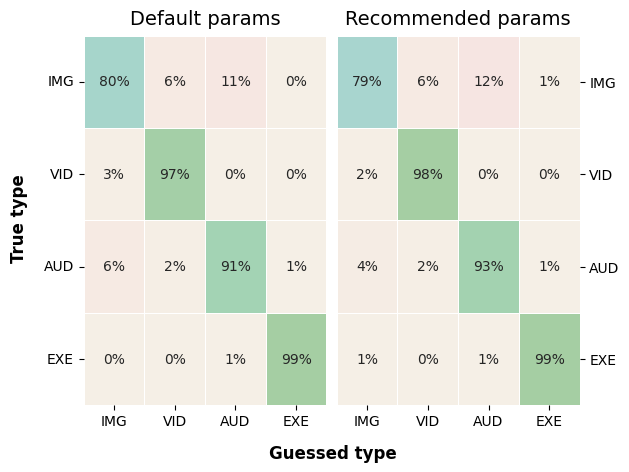

In [26]:
compareHeatmaps(rfcG8, rfcRecG8, xG8_valid, yG8_valid)

## K-Nearest Neighbors

In [27]:
showAccuracy('knn')

[S] Validation accuracy: 0.7641666666666667
[S] Train accuracy: 0.8510185185185185
[S] [Recommended] Validation accuracy: 0.7641666666666667
[S] [Recommended] Train accuracy: 0.8510185185185185


[G4] Validation accuracy: 0.8008333333333333
[G4] Train accuracy: 0.8517592592592592
[G4] [Recommended] Validation accuracy: 0.8008333333333333
[G4] [Recommended] Train accuracy: 0.8517592592592592


[G6] Validation accuracy: 0.7866666666666666
[G6] Train accuracy: 0.8543518518518518
[G6] [Recommended] Validation accuracy: 0.8083333333333333
[G6] [Recommended] Train accuracy: 0.894537037037037


[G8] Validation accuracy: 0.7683333333333333
[G8] Train accuracy: 0.8298148148148148
[G8] [Recommended] Validation accuracy: 0.7816666666666666
[G8] [Recommended] Train accuracy: 0.8655555555555555


[G4S] Validation accuracy: 0.745
[G4S] Train accuracy: 0.8184259259259259
[G4S] [Recommended] Validation accuracy: 0.75
[G4S] [Recommended] Train accuracy: 0.8629629629629629


[G6S] Validation accuracy: 0

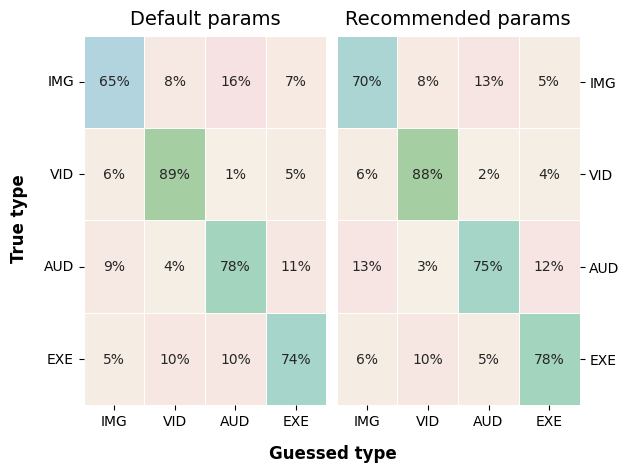

In [28]:
compareHeatmaps(knnG8, knnRecG8, xG8_valid, yG8_valid)

## XGBoost

In [29]:
showAccuracy('xgb')

[S] Validation accuracy: 0.9608333333333333
[S] Train accuracy: 0.9999074074074074
[S] [Recommended] Validation accuracy: 0.9625
[S] [Recommended] Train accuracy: 0.9999074074074074


[G4] Validation accuracy: 0.9433333333333334
[G4] Train accuracy: 0.9930555555555556
[G4] [Recommended] Validation accuracy: 0.9525
[G4] [Recommended] Train accuracy: 0.992037037037037


[G6] Validation accuracy: 0.9166666666666666
[G6] Train accuracy: 0.9909259259259259
[G6] [Recommended] Validation accuracy: 0.9266666666666666
[G6] [Recommended] Train accuracy: 0.9925925925925926


[G8] Validation accuracy: 0.9425
[G8] Train accuracy: 0.9912962962962963
[G8] [Recommended] Validation accuracy: 0.9433333333333334
[G8] [Recommended] Train accuracy: 0.9923148148148148


[G4S] Validation accuracy: 0.9641666666666666
[G4S] Train accuracy: 0.9994444444444445
[G4S] [Recommended] Validation accuracy: 0.9658333333333333
[G4S] [Recommended] Train accuracy: 0.999537037037037


[G6S] Validation accuracy: 0.954166666

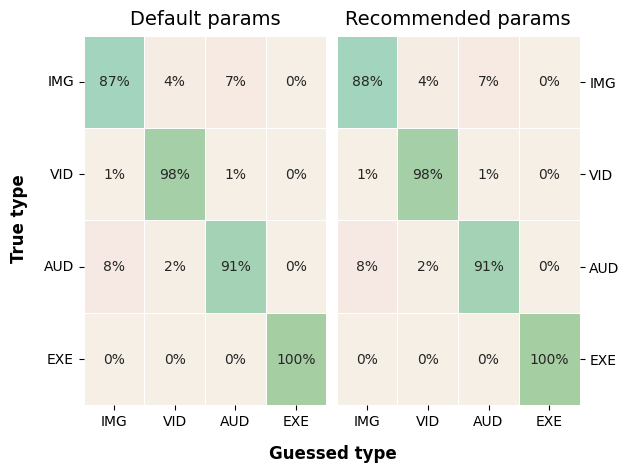

In [30]:
compareHeatmaps(xgbG8, xgbRecG8, xG8_valid, yG8_valid)

## LightGBM

In [31]:
showAccuracy('lgbm')

[S] Validation accuracy: 0.96
[S] Train accuracy: 0.9999074074074074
[S] [Recommended] Validation accuracy: 0.9625
[S] [Recommended] Train accuracy: 0.9997222222222222


[G4] Validation accuracy: 0.9483333333333334
[G4] Train accuracy: 0.991574074074074
[G4] [Recommended] Validation accuracy: 0.9575
[G4] [Recommended] Train accuracy: 0.9944444444444445


[G6] Validation accuracy: 0.9233333333333333
[G6] Train accuracy: 0.9880555555555556
[G6] [Recommended] Validation accuracy: 0.9308333333333333
[G6] [Recommended] Train accuracy: 0.9930555555555556


[G8] Validation accuracy: 0.9391666666666667
[G8] Train accuracy: 0.9887037037037038
[G8] [Recommended] Validation accuracy: 0.9441666666666667
[G8] [Recommended] Train accuracy: 0.9929629629629629


[G4S] Validation accuracy: 0.9633333333333334
[G4S] Train accuracy: 0.9993518518518518
[G4S] [Recommended] Validation accuracy: 0.9658333333333333
[G4S] [Recommended] Train accuracy: 0.9994444444444445


[G6S] Validation accuracy: 0.95
[G6S] T

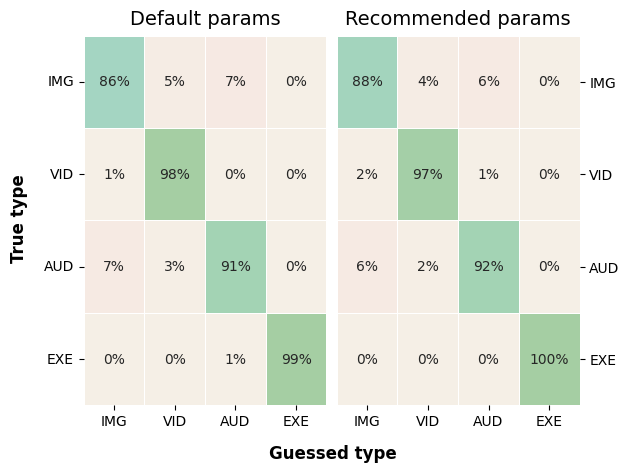

In [32]:
compareHeatmaps(lgbmG8, lgbmRecG8, xG8_valid, yG8_valid)

## CatBoost

In [33]:
showAccuracy('cbc')

[S] Validation accuracy: 0.955
[S] Train accuracy: 0.999537037037037
[S] [Recommended] Validation accuracy: 0.9533333333333334
[S] [Recommended] Train accuracy: 0.9993518518518518


[G4] Validation accuracy: 0.9466666666666667
[G4] Train accuracy: 0.986574074074074
[G4] [Recommended] Validation accuracy: 0.9425
[G4] [Recommended] Train accuracy: 0.9783333333333334


[G6] Validation accuracy: 0.9175
[G6] Train accuracy: 0.9840740740740741
[G6] [Recommended] Validation accuracy: 0.9141666666666667
[G6] [Recommended] Train accuracy: 0.9641666666666666


[G8] Validation accuracy: 0.9316666666666666
[G8] Train accuracy: 0.9831481481481481
[G8] [Recommended] Validation accuracy: 0.9333333333333333
[G8] [Recommended] Train accuracy: 0.9717592592592592


[G4S] Validation accuracy: 0.965
[G4S] Train accuracy: 0.9987037037037036
[G4S] [Recommended] Validation accuracy: 0.9466666666666667
[G4S] [Recommended] Train accuracy: 0.9544444444444444


[G6S] Validation accuracy: 0.9491666666666667
[G6S] 

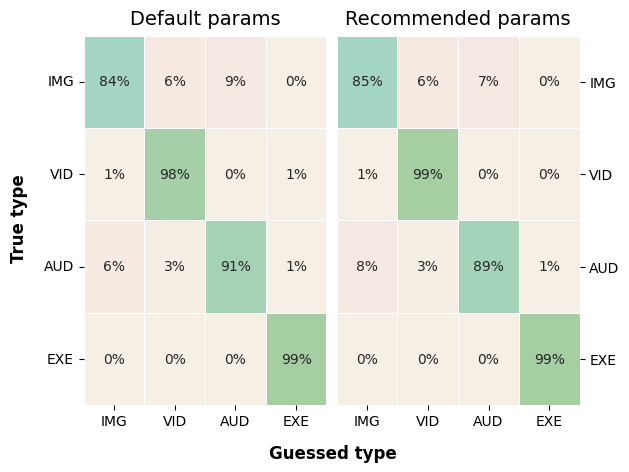

In [34]:
compareHeatmaps(cbcG8, cbcRecG8, xG8_valid, yG8_valid)

---

# ✍ Testing
_[> Back to contents](#Contents:)_

In [1]:
import dill
dill.load_session('models.pkl')

In [2]:
tS   = pd.DataFrame(columns = Split)
tG4  = pd.DataFrame(columns = NGrams)
tG6  = pd.DataFrame(columns = NGrams)
tG8  = pd.DataFrame(columns = NGrams)
tG4S = pd.DataFrame(columns = Split)
tG6S = pd.DataFrame(columns = Split)
tG8S = pd.DataFrame(columns = Split)

In [3]:
path  = "data_test/"
files = [ file for file in listdir(path) if isfile(path + file) ]
        
for file in tqdm(files, desc='File'):
    
    hexfile = hexlify(open(path + file, 'rb').read()).decode()            # hex representation
    Bytes = [ hexfile[i:i+2] for i in range(0, len(hexfile)-1, 2) ]       # 
    
    partSize = len(Bytes) // 3
    part1 = Bytes[            :   partSize]
    part2 = Bytes[   partSize : 2*partSize]
    part3 = Bytes[ 2*partSize :           ]

    tS   =   tS.append( pd.DataFrame([ calc(Bytes, part1, part2, part3, frmt, mode="S"  )], columns = tS.columns   ))
    tG4  =  tG4.append( pd.DataFrame([ calc(Bytes, part1, part2, part3, frmt, mode="G4" )], columns = tG4.columns  ))
    tG6  =  tG6.append( pd.DataFrame([ calc(Bytes, part1, part2, part3, frmt, mode="G6" )], columns = tG6.columns  ))
    tG8  =  tG8.append( pd.DataFrame([ calc(Bytes, part1, part2, part3, frmt, mode="G8" )], columns = tG8.columns  ))
    tG4S = tG4S.append( pd.DataFrame([ calc(Bytes, part1, part2, part3, frmt, mode="G4S")], columns = tG4S.columns ))
    tG6S = tG6S.append( pd.DataFrame([ calc(Bytes, part1, part2, part3, frmt, mode="G6S")], columns = tG6S.columns )) 
    tG8S = tG8S.append( pd.DataFrame([ calc(Bytes, part1, part2, part3, frmt, mode="G8S")], columns = tG8S.columns ))

File: 100%|▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬| 16/16 [01:08<00:00, 4.28s/it]


In [4]:
files

['conversation.mp3',
 'documents.bmp',
 'door.exe',
 'google_dino.png',
 'map.bmp',
 'opening.wav',
 'puppy-attacks-toy.jpg',
 'puppy-meme.png',
 'python-3.7.4.exe',
 'recording.avi',
 'secret.bmp',
 'steps.avi',
 'task.wav',
 'they.mp3',
 'tryharder.exe',
 'wise-puppy-in-glasses.jpg']

In [5]:
accuracy_score(leType.transform(['Audio','Image','Executable','Image','Image',
                                'Audio', 'Image','Image','Executable',
                                'Video','Image','Video','Audio',
                                'Audio','Executable','Image'
                                ]), knnRecG8.predict(tG8.values))

0.875

In [6]:
leType.inverse_transform(knnRecG8.predict(tG8.values))

array(['Audio', 'Image', 'Executable', 'Image', 'Image', 'Audio', 'Image',
       'Image', 'Executable', 'Executable', 'Image', 'Video', 'Audio',
       'Executable', 'Executable', 'Image'], dtype='<U10')

---

# 📚 Resources
_[> Back to contents](#Contents:)_

### Datasets:

>`[1]` Chao Dong, Chen Change Loy, Xiaoou Tang. Accelerating the Super-Resolution Convolutional Neural Network, in Proceedings of European Conference on Computer Vision (ECCV), 2016 [arXiv:1608.00367](https://arxiv.org/abs/1608.00367)
<br>

>`[2]` Zhang Zhifei, Song Yang, and Qi Hairong. "Age Progression/Regression by Conditional Adversarial Autoencoder". IEEE Conference on Computer Vision and Pattern Recognition (CVPR). [arXiv:1702.08423](https://arxiv.org/abs/1702.08423), 2017
<br>

>`[3]` H. Kuehne, H. Jhuang, E. Garrote, T. Poggio, and T. Serre. HMDB: A Large Video Database for Human Motion Recognition. ICCV, 2011. [PDF](http://serre-lab.clps.brown.edu/wp-content/uploads/2012/08/Kuehne_etal_iccv11.pdf) [Bibtex](http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/Kuehne_etal_iccv11.bib)
<br>

>`[4]` Eduardo Fonseca, Manoj Plakal, Daniel P. W. Ellis, Frederic Font, Xavier Favory, and Xavier Serra, “Learning Sound Event Classifiers from Web Audio with Noisy Labels”, arXiv preprint [arXiv:1901.01189](https://arxiv.org/abs/1901.01189), 2019
<br>

>`[5]` Royi Ronen, Marian Radu, Corina Feuerstein, Elad Yom-Tov, Mansour Ahmadi. "Microsoft Malware Classification Challenge". [arXiv:1802.10135](https://arxiv.org/abs/1802.10135), 2018

### Images:

>`[6]` [An Audio Encryption Using Transposition Method](https://www.researchgate.net/publication/281444376_An_Audio_Encryption_Using_Transposition_Method) - Scientific Figure on ResearchGate.
<br>

>`[7]` Mp3filestructure, original by [Kim Meyrick](https://en.wikipedia.org/wiki/User:Kim_Meyrick). Traced by [Stannered](https://commons.wikimedia.org/wiki/User:Stannered) (23 Apr 2007), fixed by [Mik](https://commons.wikimedia.org/wiki/User:Mik) (20 Dec 2013). 
<br>

>`[8]` Portable Executable 32 bit Structure, original by ByteBiter. Fixed by [Benhut1](https://commons.wikimedia.org/wiki/User:Benhut1) (1 Sep 2016), fixed by [Finnusertop](https://commons.wikimedia.org/wiki/User:Finnusertop) (29 Sep 2019). 